In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install tensorflow-gpu

In [ ]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
import tensorflow as tf

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Titanic/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratery data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


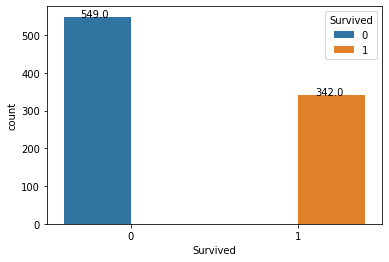

In [ ]:
ax=sns.countplot("Survived",data=df,hue="Survived")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.10,p.get_height()+0.1))
    

In [ ]:
#No of Survival are less as compare to not survived

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


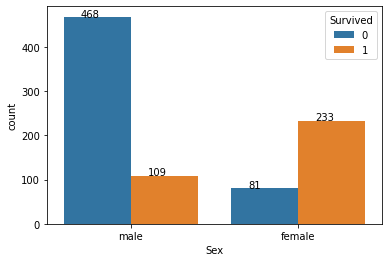

In [ ]:
ax=sns.countplot("Sex",data=df,hue="Survived")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.10,p.get_height()+0.1))

In [ ]:
# Gender plays important role
# male: Survival chances are less
# female: Survival chances are more

In [ ]:
# Male Passanger Count=?
# female Passanger Count=?
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
# No  Male Passanger survived=?
# No  Male Passanger notsurvived=?
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [ ]:
df['Survived'][df['Sex']=='male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [ ]:
# No  female Passanger survived=?
# No  female Passanger notsurvived=?
df['Survived'][df['Sex']=='female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


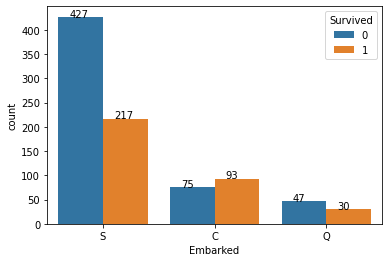

In [ ]:
ax=sns.countplot("Embarked",data=df,hue="Survived")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.10,p.get_height()+0.1))

In [ ]:
# C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
# S Passanger Count=?
# C Passanger Count=?
# Q Passanger Count=?
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Data Preprocessing


In [ ]:
# Age col have some missing values

# Missing value=mean(),median(),mode()

median_age=df['Age'].median()
df['Age']=df['Age'].fillna(median_age)
print("Age median value:- ",median_age)

Age median value:-  28.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# now focus on Embarked     
# C = Cherbourg, Q = Queenstown, S = Southampton
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# for fillna data we suppose to fill with S because S has highest count and only two count are NA 
df['Embarked']=df['Embarked'].fillna('S')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# gender and Embarked are catagorical data
# Encode them using different encodding tech

In [ ]:
#Encode Embarked using one_hot encoding
embarked_dict={"S":1,"C":2,"Q":3}
df["Embarked"]=df['Embarked'].map(embarked_dict)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1


In [ ]:
#Encode gender using Integer Encoding/Ordinal number Encoding
Gender_encoded=pd.get_dummies(df['Sex'])
df=pd.concat([df,Gender_encoded],axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,0,1


In [ ]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'female', 'male'],
      dtype='object')

In [ ]:
X=df[['Pclass',  'Age', 'SibSp',
       'Parch', 'Fare',  'Embarked', 'female', 'male']]
y=df['Survived']

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,2,1,0
2,3,26.0,0,0,7.9250,1,1,0
3,1,35.0,1,0,53.1000,1,1,0
4,3,35.0,0,0,8.0500,1,0,1


In [ ]:
# split the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [ ]:
print("X_train:-",X_train.shape)
print("X_test:-",X_test.shape)
print("y_train:-",y_train.shape)
print("y_test:-",y_test.shape)

X_train:- (623, 8)
X_test:- (268, 8)
y_train:- (623,)
y_test:- (268,)


In [ ]:
#Model_Eval Fun

from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
def model_Eval(y_test,y_pred):

    acc=accuracy_score(y_test,y_pred)
    print("Accuracy :-",acc)
    print("Error rate :-",1-acc)
    print("Precision:-",precision_score(y_test,y_pred,average='weighted'))
    print("Recall:- ",recall_score(y_test,y_pred,average='weighted'))
    print("F1 score :- ",f1_score(y_test,y_pred,average='weighted'))

    #Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    plt.figure(figsize=(10,5))
    sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt=".1f")
    plt.xlabel('Predicted')
    plt.ylabel("Actual")


#Step 5: Build ANN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,ReLU,LeakyReLU,PReLU
from tensorflow.keras.layers import Dropout

# creating the Model
classifer=Sequential()

#Adding input layer
classifer.add(Dense(units=8,activation='relu'))

#Adding first hidden layer
classifer.add(Dense(units=6,activation='relu'))

# Adding second hidden layer
classifer.add(Dense(units=6,activation='relu'))

# Adding output layer
classifer.add(Dense(units=1,activation='sigmoid'))

# complie the model 
# Default Ir=0.001
classifer.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
# train the ANN Model
model_history=classifer.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=200,callbacks=early_stopping)

Epoch 1/200
42/42 [==============================] - 1s 8ms/step - loss: 0.8035 - accuracy: 0.5588 - val_loss: 0.6406 - val_accuracy: 0.6845
Epoch 2/200
42/42 [==============================] - 0s 5ms/step - loss: 0.6686 - accuracy: 0.6763 - val_loss: 0.6153 - val_accuracy: 0.6748
Epoch 3/200
42/42 [==============================] - 0s 4ms/step - loss: 0.6376 - accuracy: 0.6835 - val_loss: 0.5996 - val_accuracy: 0.6845
Epoch 4/200
42/42 [==============================] - 0s 5ms/step - loss: 0.6193 - accuracy: 0.6835 - val_loss: 0.5899 - val_accuracy: 0.6893
Epoch 5/200
42/42 [==============================] - 0s 5ms/step - loss: 0.6101 - accuracy: 0.6882 - val_loss: 0.5861 - val_accuracy: 0.6845
Epoch 6/200
42/42 [==============================] - 0s 5ms/step - loss: 0.6051 - accuracy: 0.6859 - val_loss: 0.5852 - val_accuracy: 0.6893
Epoch 7/200
42/42 [==============================] - 0s 4ms/step - loss: 0.6038 - accuracy: 0.6882 - val_loss: 0.5841 - val_accuracy: 0.6845
Epoch 8/200
4

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

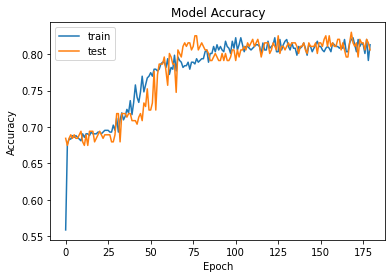

In [ ]:
# Graph Between ACC and Epoch
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title("Model Accuracy")

plt.ylabel("Accuracy")
plt.xlabel("Epoch")

plt.legend(['train','test'],loc='upper left')
plt.show()


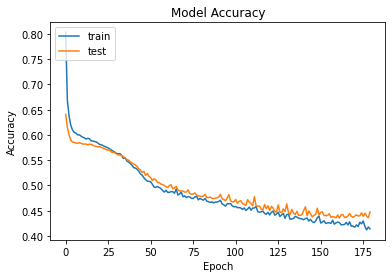

In [ ]:
# Graph Between Loss and Epoch
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title("Model Accuracy")

plt.ylabel("Accuracy")
plt.xlabel("Epoch")

plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
y_pred=classifer.predict(X_test)
y_pred=(y_pred>=0.5)


9/9 [==============================] - 0s 2ms/step


Accuracy :- 0.746268656716418
Error rate :- 0.25373134328358204
Precision:- 0.7482587064676618
Recall:-  0.746268656716418
F1 score :-  0.7470961057744123
[[128  36]
 [ 32  72]]


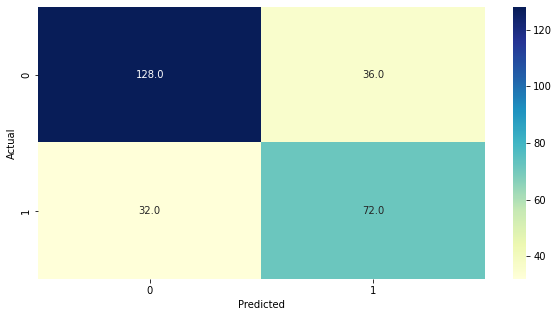

In [ ]:
model_Eval(y_test,y_pred)